In [136]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [137]:
home = os.getcwd().split('AUT-CNN-TUB')[0]
canon_path  = os.path.join(home,'AUT-CNN-TUB/Data/27072018/27072018_canon/AllParts')
industy_path  = os.path.join(home,'AUT-CNN-TUB/Data/27072018/27072018_industry/AllParts')

In [138]:
len(os.listdir(os.path.join(home,industy_path)))

1126

In [139]:
img_name = os.listdir(os.path.join(home,industy_path))[1120]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)

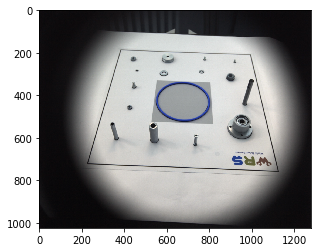

In [140]:
plt.imshow(image)
plt.show()

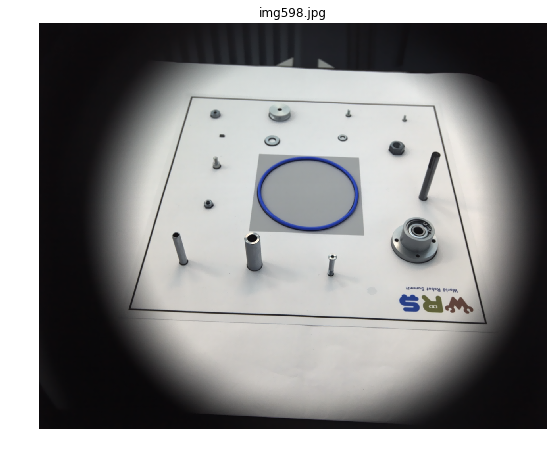

In [141]:
blurred = cv2.bilateralFilter(image,10, 10, 10)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

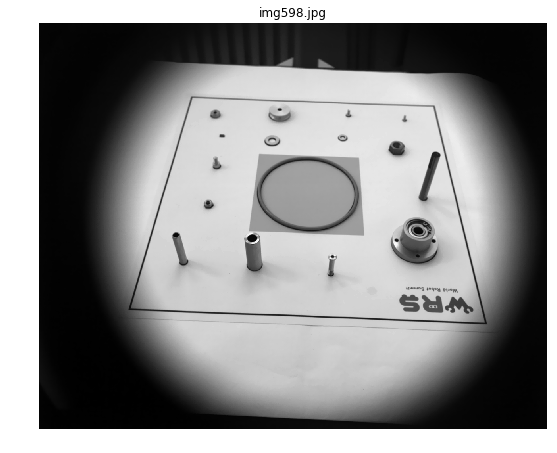

In [142]:
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(imgray, cmap='gray');#
plt.show()

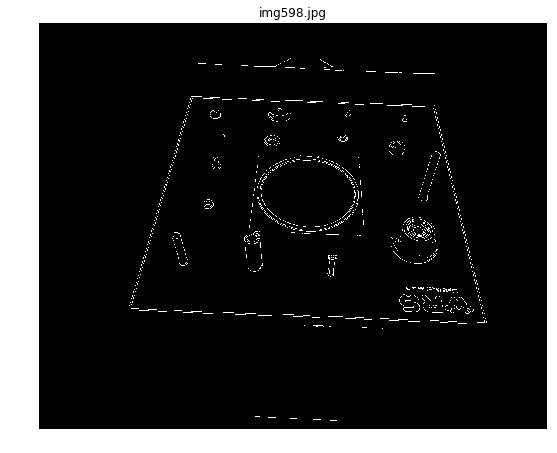

In [143]:
thresh = cv2.Canny(blurred,200,200)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray');
plt.show()

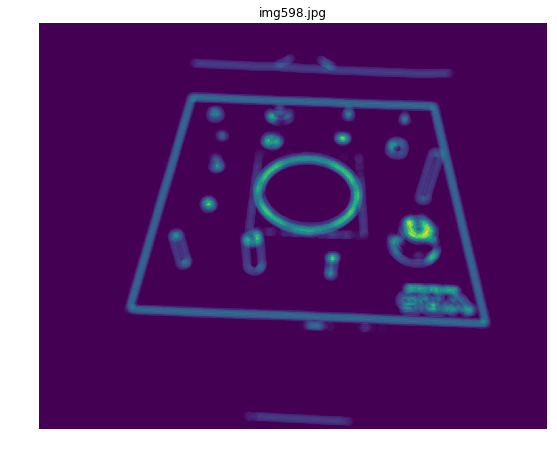

In [144]:
blurred = cv2.bilateralFilter(thresh,25, 800, 800)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

In [145]:
sub_contour= []
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if len(c) < 800:
        if len(c) > 20:
            if ((c[:,:,0].max()-c[:,:,0].min()) > 500 and (c[:,:,1].max()-c[:,:,1].min()) > 500):
     #       print(len(c)    
                sub_contour.append(c)

In [146]:
len(sub_contour)

2

In [161]:
mask = np.zeros(blurred.shape,np.uint8)
area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))

In [162]:
area.max()

1

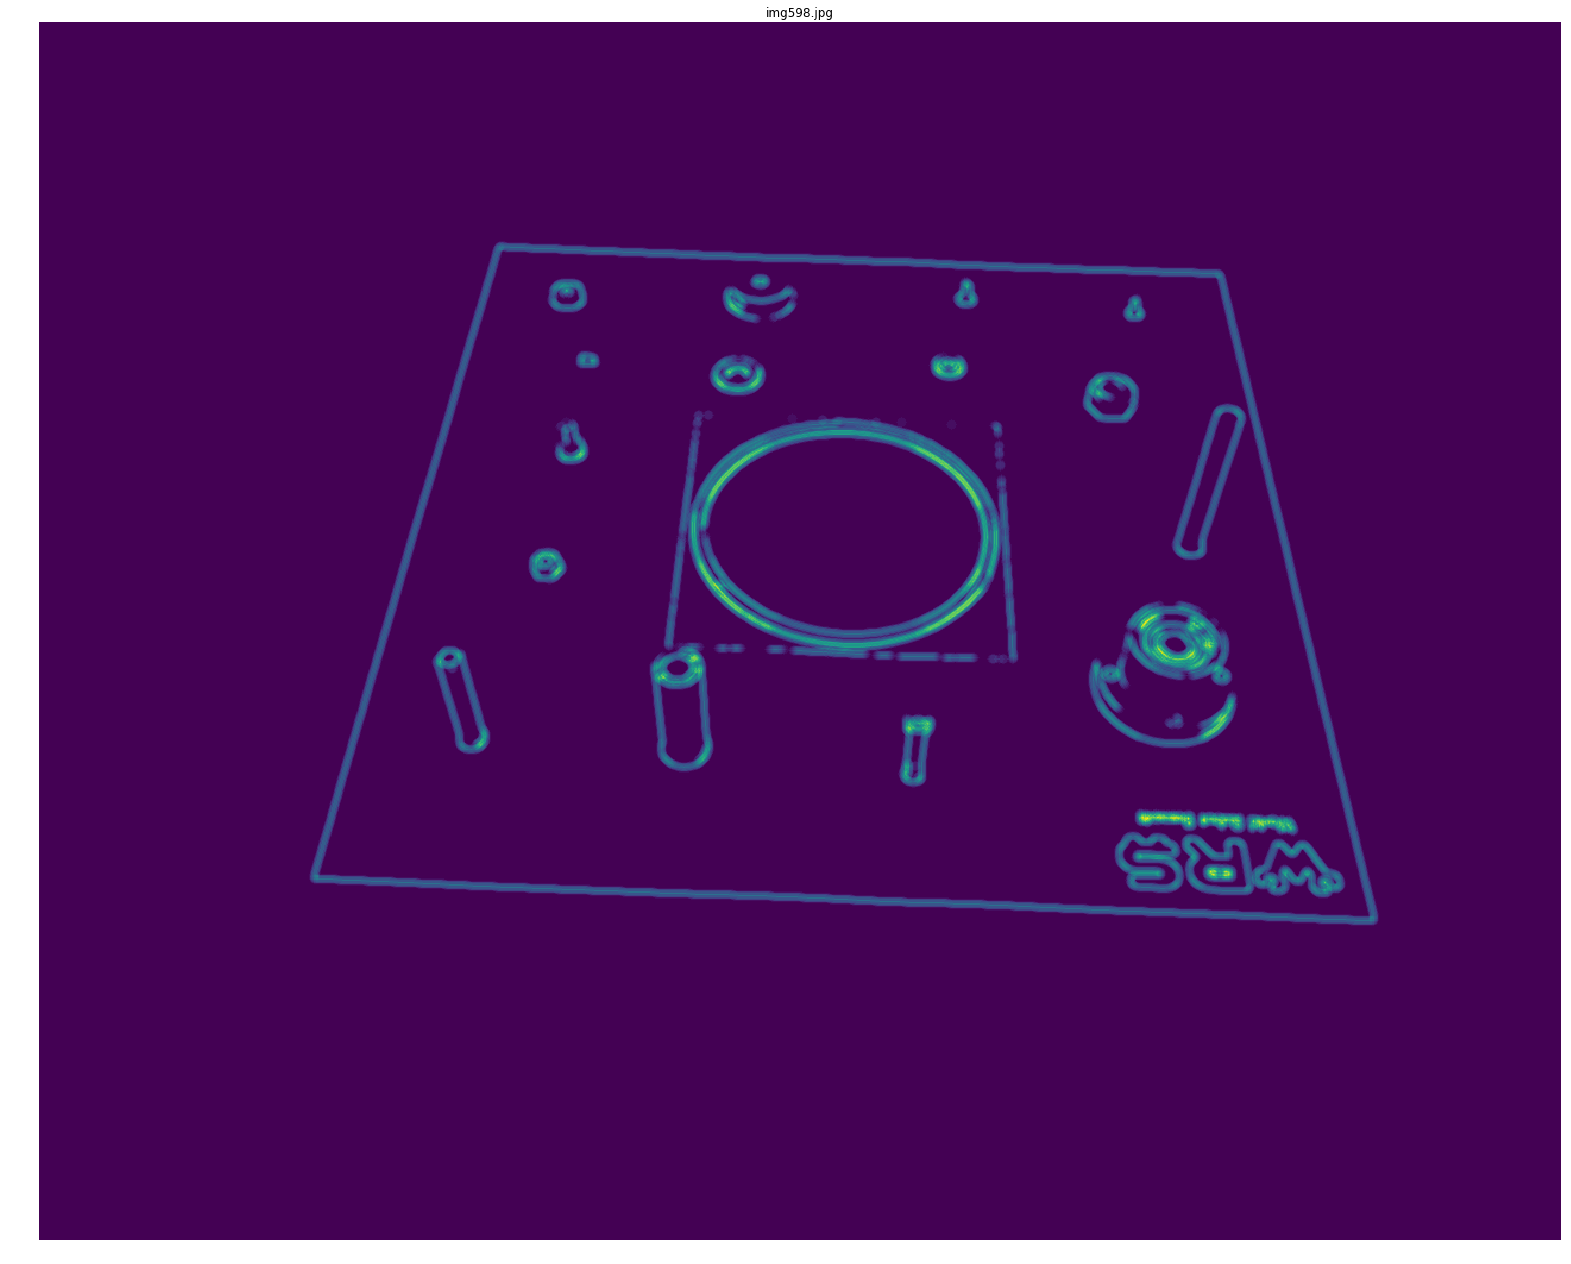

In [165]:
blurred = cv2.bilateralFilter(thresh*area,8, 800, 800)

fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

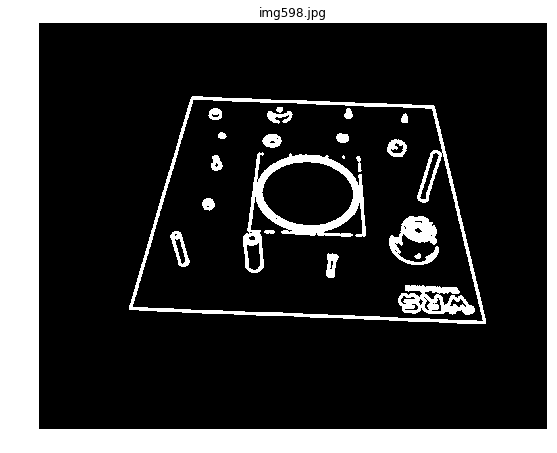

In [166]:
ret,thresh = cv2.threshold(blurred,1,255,0)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray');
plt.show()

In [167]:
sub_contour = []
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if len(c) < 500:
        if len(c) > 20:
     #       print(len(c)    
            sub_contour.append(c)


In [168]:
img_name = os.listdir(os.path.join(home,industy_path))[1120]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)
img = image

In [169]:
img = cv2.drawContours(image, sub_contour, -3, (255,255,255), 3)
center = []
counter = 0
for c in sub_contour:
    counter += 1
    # compute the center of the contour
    M = cv2.moments(c)
    try:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.putText(image, str(counter), (cx + 30, cy - 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        center.append([cx , cy ])
    except:
        print('moment is zero')

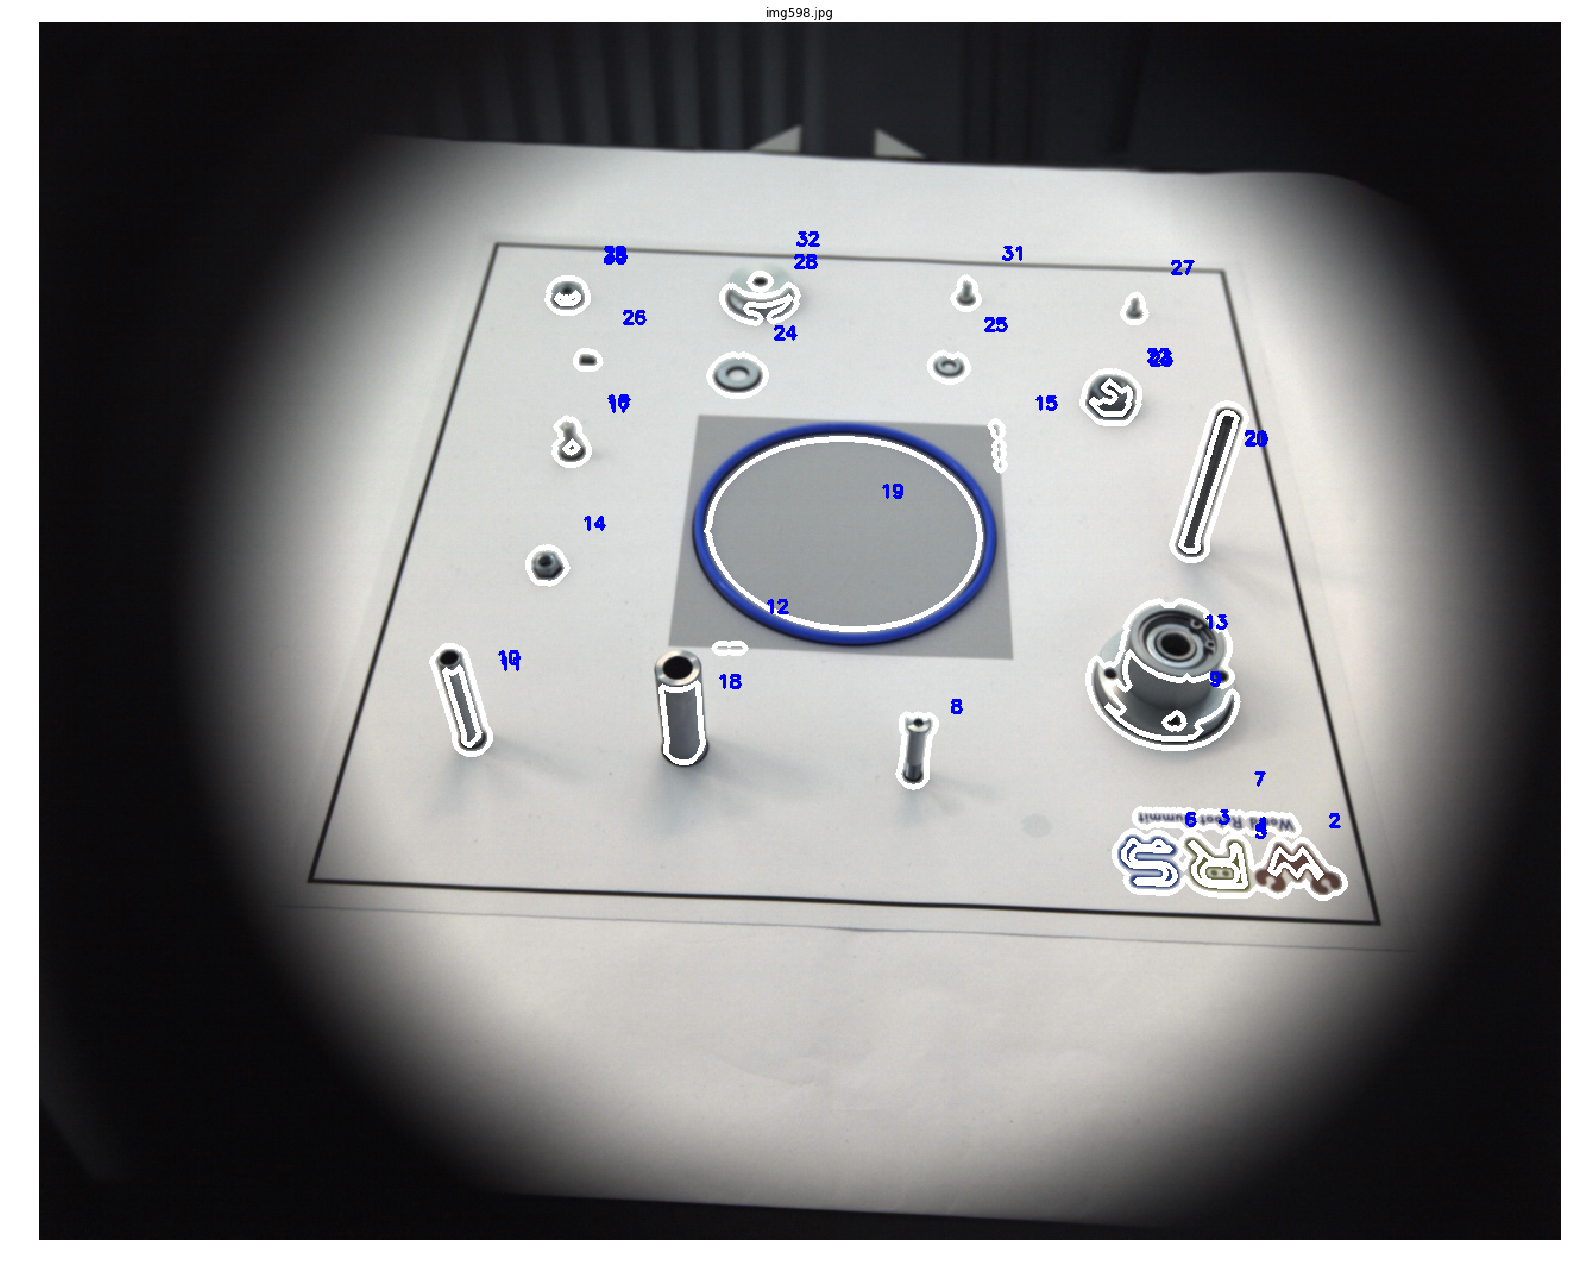

In [170]:
fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img, cmap='gray');

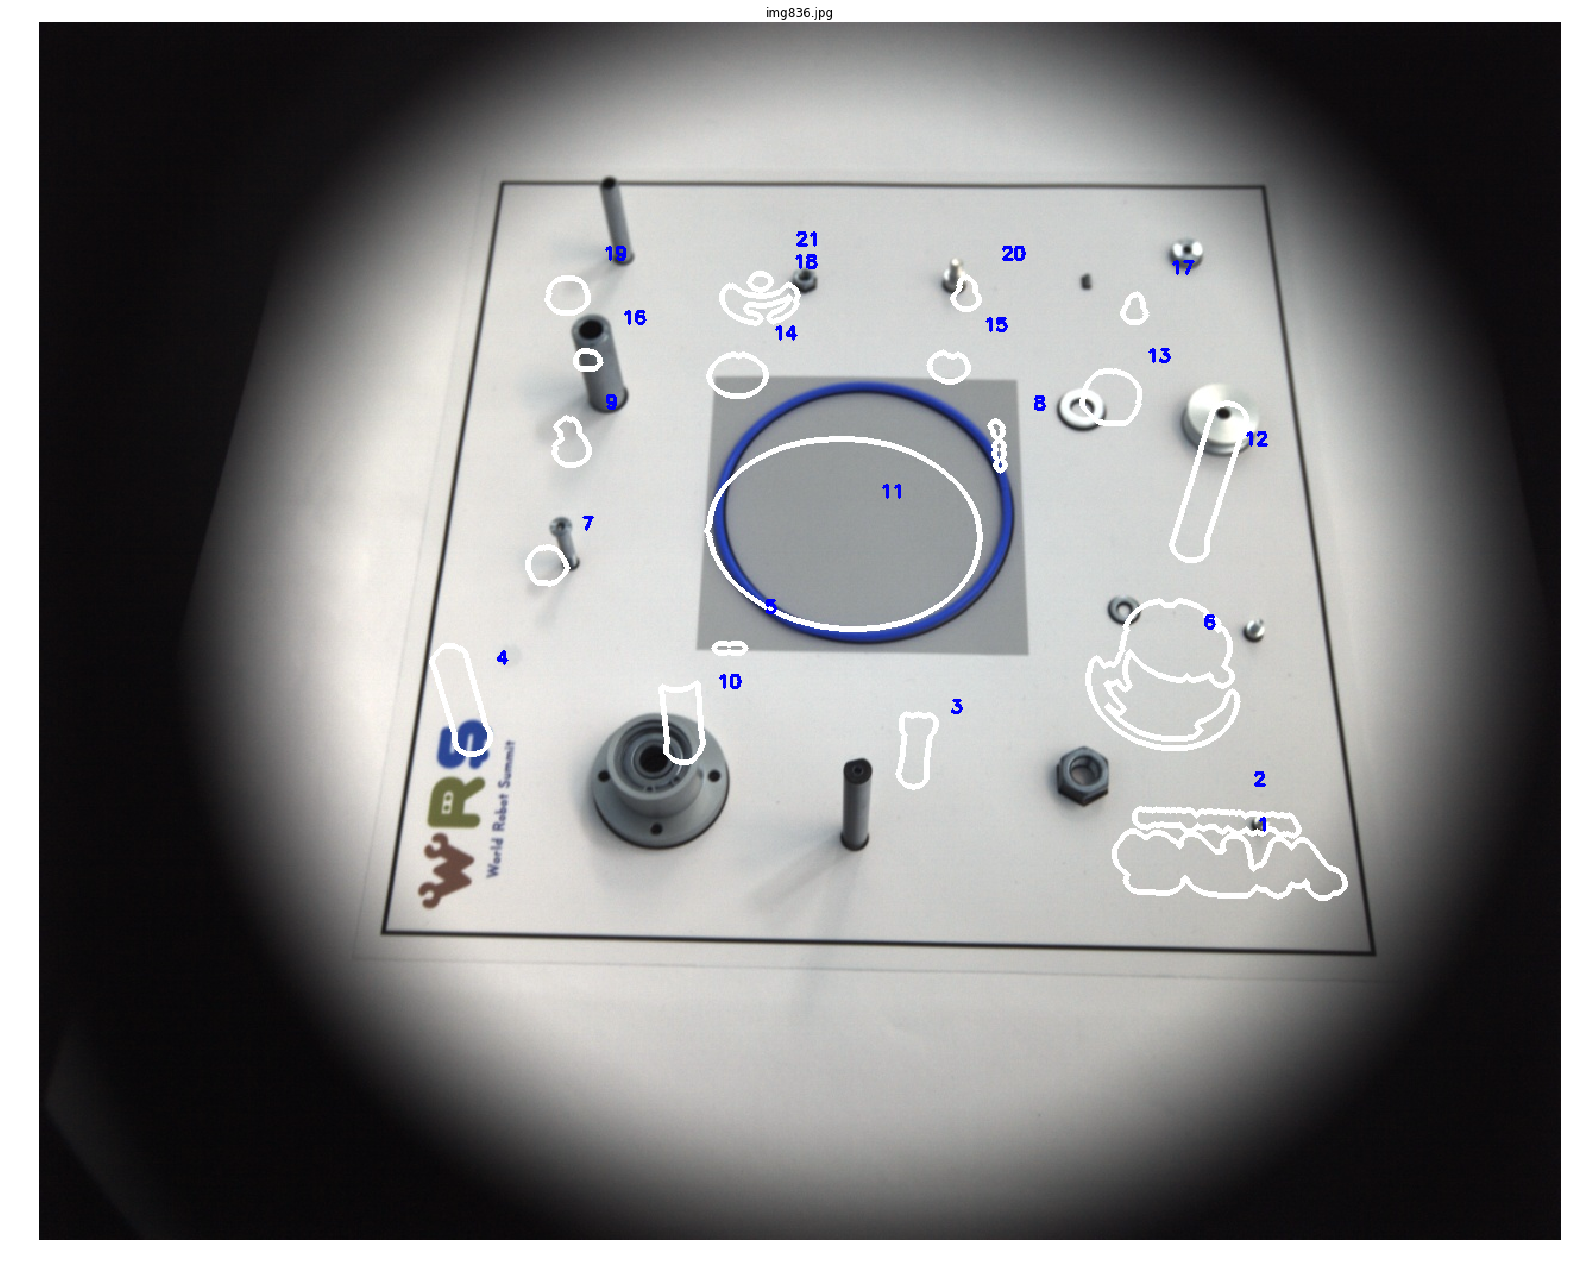

In [171]:
img_name = os.listdir(os.path.join(home,industy_path))[881]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)
img = image

center = []
counter = 0
for c in sub_contour:
    counter += 1
    # compute the center of the contour
    M = cv2.moments(c)
    try:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center.append([cx , cy ])
    except:
        print('moment is zero')
        
# find near center

center = np.array(center)
counter = 0
candidats = []
for i in center:
    counter += 1

    for e,s in enumerate(np.abs(center - i)):
        dist = np.linalg.norm(s)
        if (dist < 50 and dist !=0) == True:
            candidats.append(e)
            
to_drop = []
for e,c in enumerate(sub_contour):
    for n,test in enumerate(sub_contour):
       # if n!= e:
        if c[:,:,0].max() < test[:,:,0].max():
            if c[:,:,0].min()  >  test[:,:,0].min():
                if c[:,:,1].min() > test[:,:,1].min():
                    if c[:,:,1].max() < test[:,:,1].max():
                        to_drop.append(e)
                        

sub_contour = np.delete(sub_contour, to_drop)
center = np.delete(center,to_drop,0)

img = cv2.drawContours(img, sub_contour, -4, (255,255,255), 3)

for e,ce in enumerate(center,1):
    cv2.putText(img, str(e), (ce[0] + 30, ce[1] - 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img, cmap='gray');

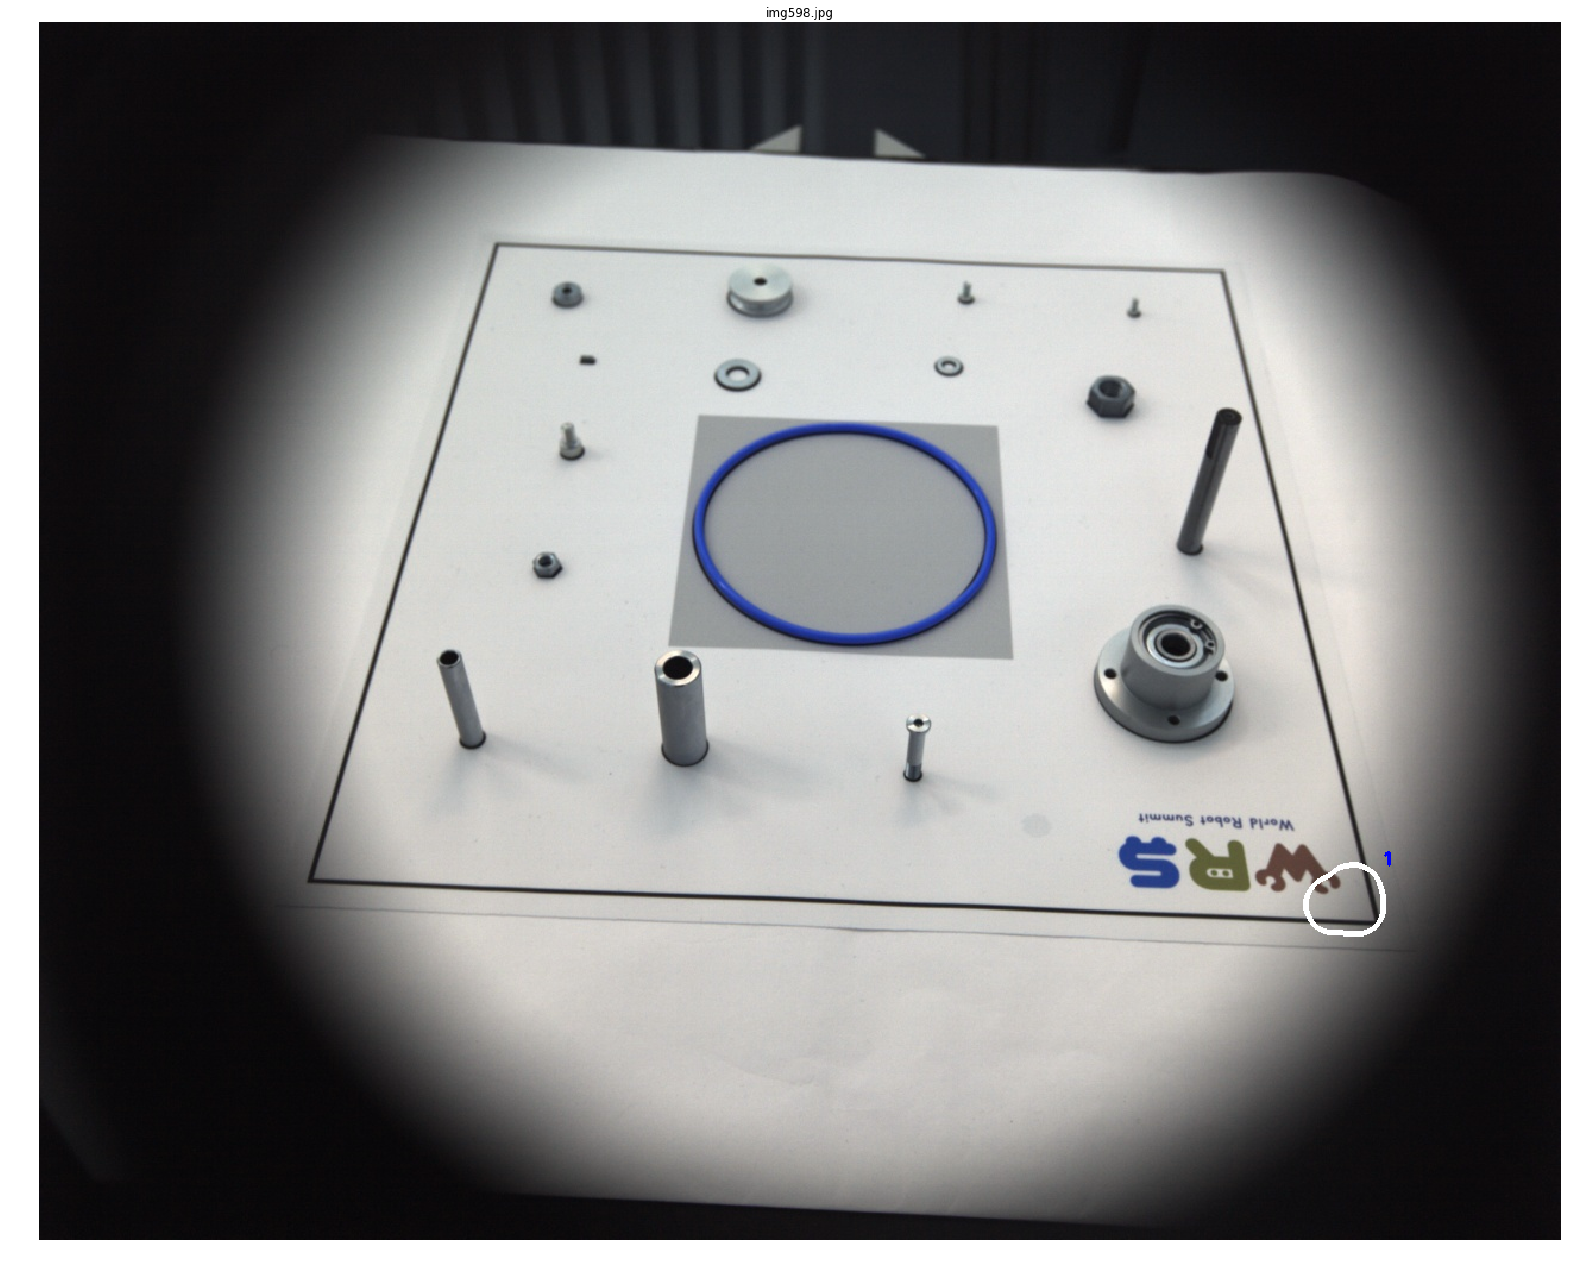

In [175]:
img_name = os.listdir(os.path.join(home,industy_path))[1120]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)

blurred = cv2.bilateralFilter(image,25, 10, 10)
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
mask = np.zeros(blurred.shape,np.uint8)
sub_contour = [] 
for c in contours:
    if len(c) < 800:
        if len(c) > 20:
            if ((c[:,:,0].max()-c[:,:,0].min()) < 300 and (c[:,:,1].max()-c[:,:,1].min()) < 300):
     #       print(len(c)    
                sub_contour.append(c)
        
area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))
thresh = cv2.Canny(blurred*area,200,300)
blurred = cv2.bilateralFilter(thresh,25, 800, 800)
ret,thresh = cv2.threshold(blurred,1,255,0)
ret,thresh = cv2.threshold(blurred,1,255,0)
sub_contour = []
_,contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    if len(c) < 800:
        if len(c) > 20:
            if ((c[:,:,0].max()-c[:,:,0].min()) < 300 and (c[:,:,1].max()-c[:,:,1].min()) < 300):
     #       print(len(c)    
                sub_contour.append(c)

center = []
counter = 0
for c in sub_contour:
    counter += 1
    # compute the center of the contour
    M = cv2.moments(c)
    try:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        center.append([cx , cy ])
    except:
        print('moment is zero')
        
# find near center
center = np.array(center)
counter = 0
candidats = []
for i in center:
    counter += 1

    for e,s in enumerate(np.abs(center - i)):
        dist = np.linalg.norm(s)
        if (dist < 50 and dist !=0) == True:
            candidats.append(e)
            
to_drop = []
for e,c in enumerate(sub_contour):
    for n,test in enumerate(sub_contour):
        if n!= e:
            if c[:,:,0].max() < test[:,:,0].max():
                if c[:,:,0].min()  >  test[:,:,0].min():
                    if c[:,:,1].min() > test[:,:,1].min():
                        if c[:,:,1].max() < test[:,:,1].max():
                            to_drop.append(e)
                        

sub_contour = np.delete(sub_contour, to_drop)
center = np.delete(center,to_drop,0)

img = cv2.drawContours(image, sub_contour, -4, (255,255,255), 3)

for e,ce in enumerate(center,1):
    cv2.putText(img, str(e), (ce[0] + 30, ce[1] - 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img, cmap='gray');

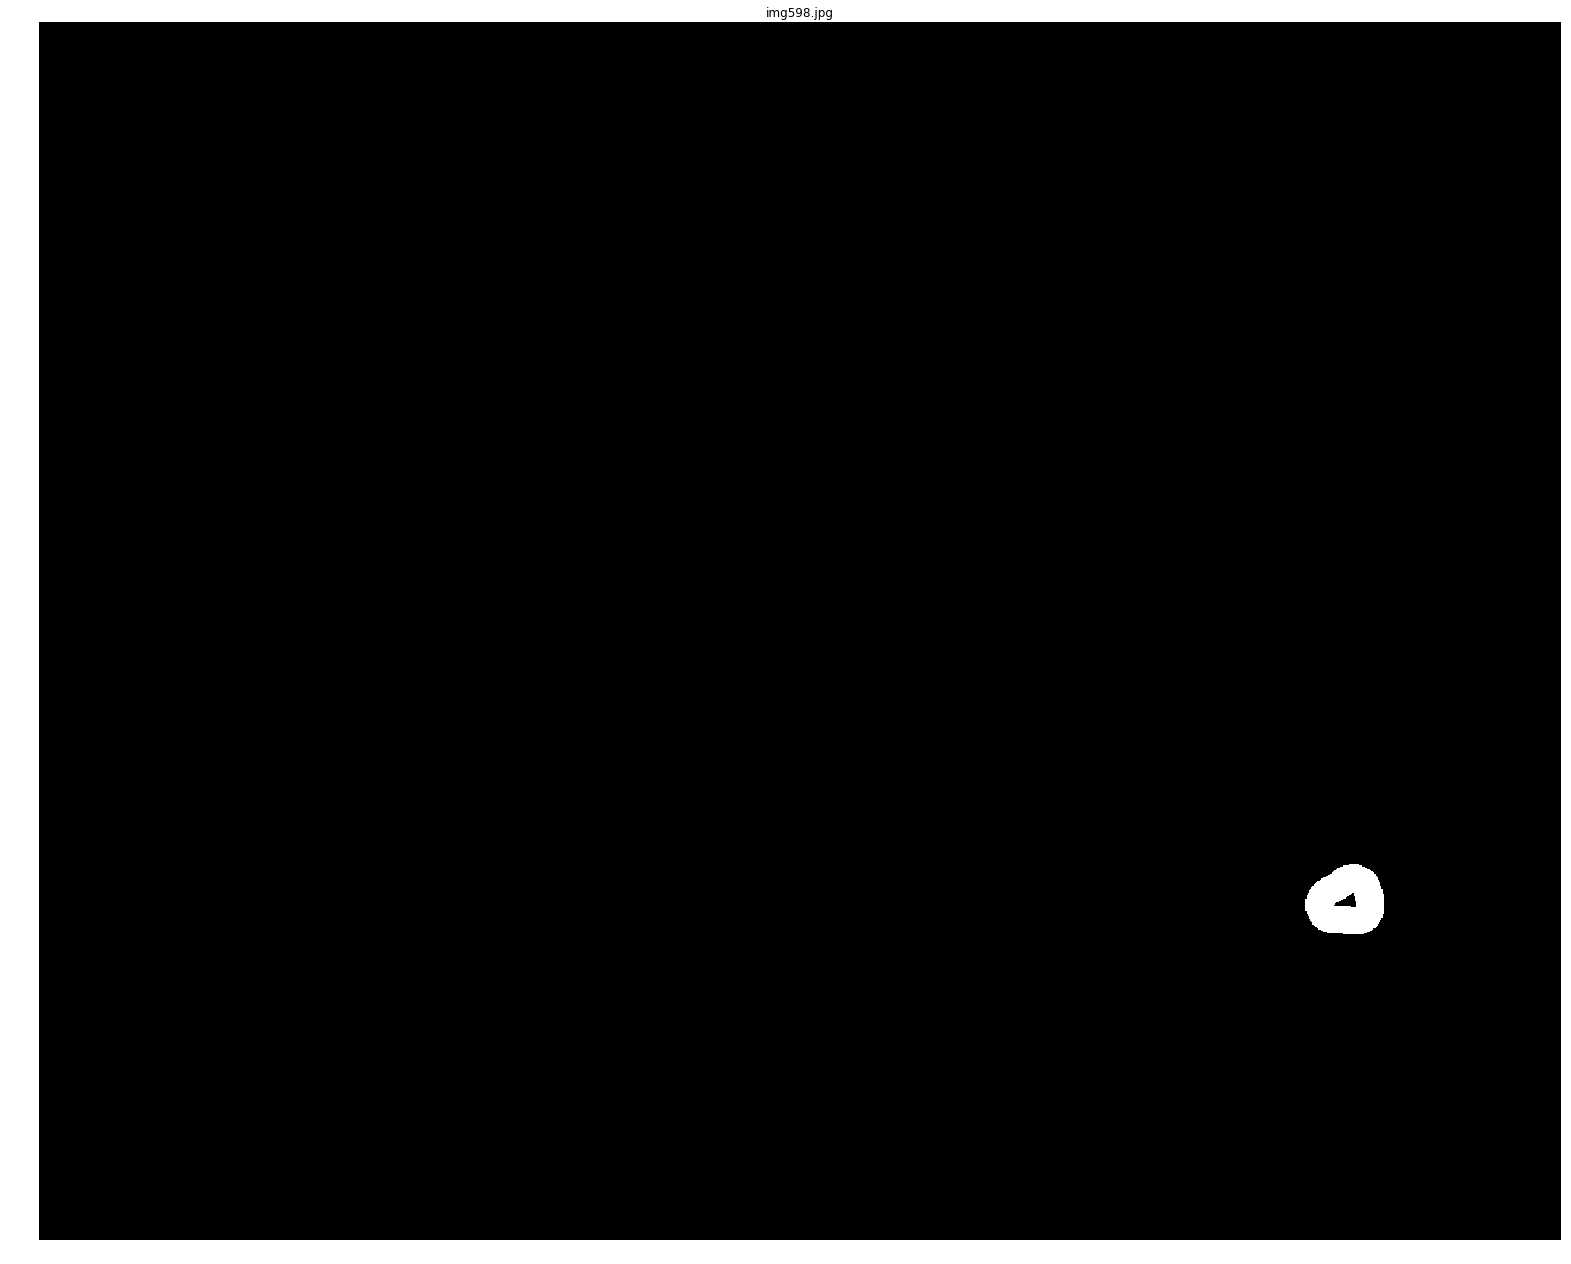

In [176]:
fig = plt.figure(figsize=(60,60))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray');